Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

Желательно, но не обязательно:*

Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
df = pd.read_csv('german_used_cars.csv', sep = ',')
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [222]:
df.isna().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

In [223]:
df.describe().round(2)

,Unnamed: 0,mileage_in_km
count,251079.00,250927.00
mean,125539.00,85340.02
std,72480.41,78717.06
min,0.00,0.00
25%,62769.50,24904.00
50%,125539.00,67500.00
75%,188308.50,126500.00
max,251078.00,3800000.00


In [224]:
df.describe(include = 'object')

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,offer_description
count,251079,251079,250913,251075,251079,251079,250945,250950,251079,251079,224206,251079,251078
unique,47,1312,14,433,91,18228,596,578,4,136,621,1500,200945
top,volkswagen,Volkswagen Golf,black,03/2023,2019,19990,110,150,Automatic,Petrol,"4,9 l/100 km",- (g/km),Titanium
freq,33281,7588,58720,4746,29225,1592,25986,25987,131749,143280,8158,35809,174


<function matplotlib.pyplot.show(close=None, block=None)>

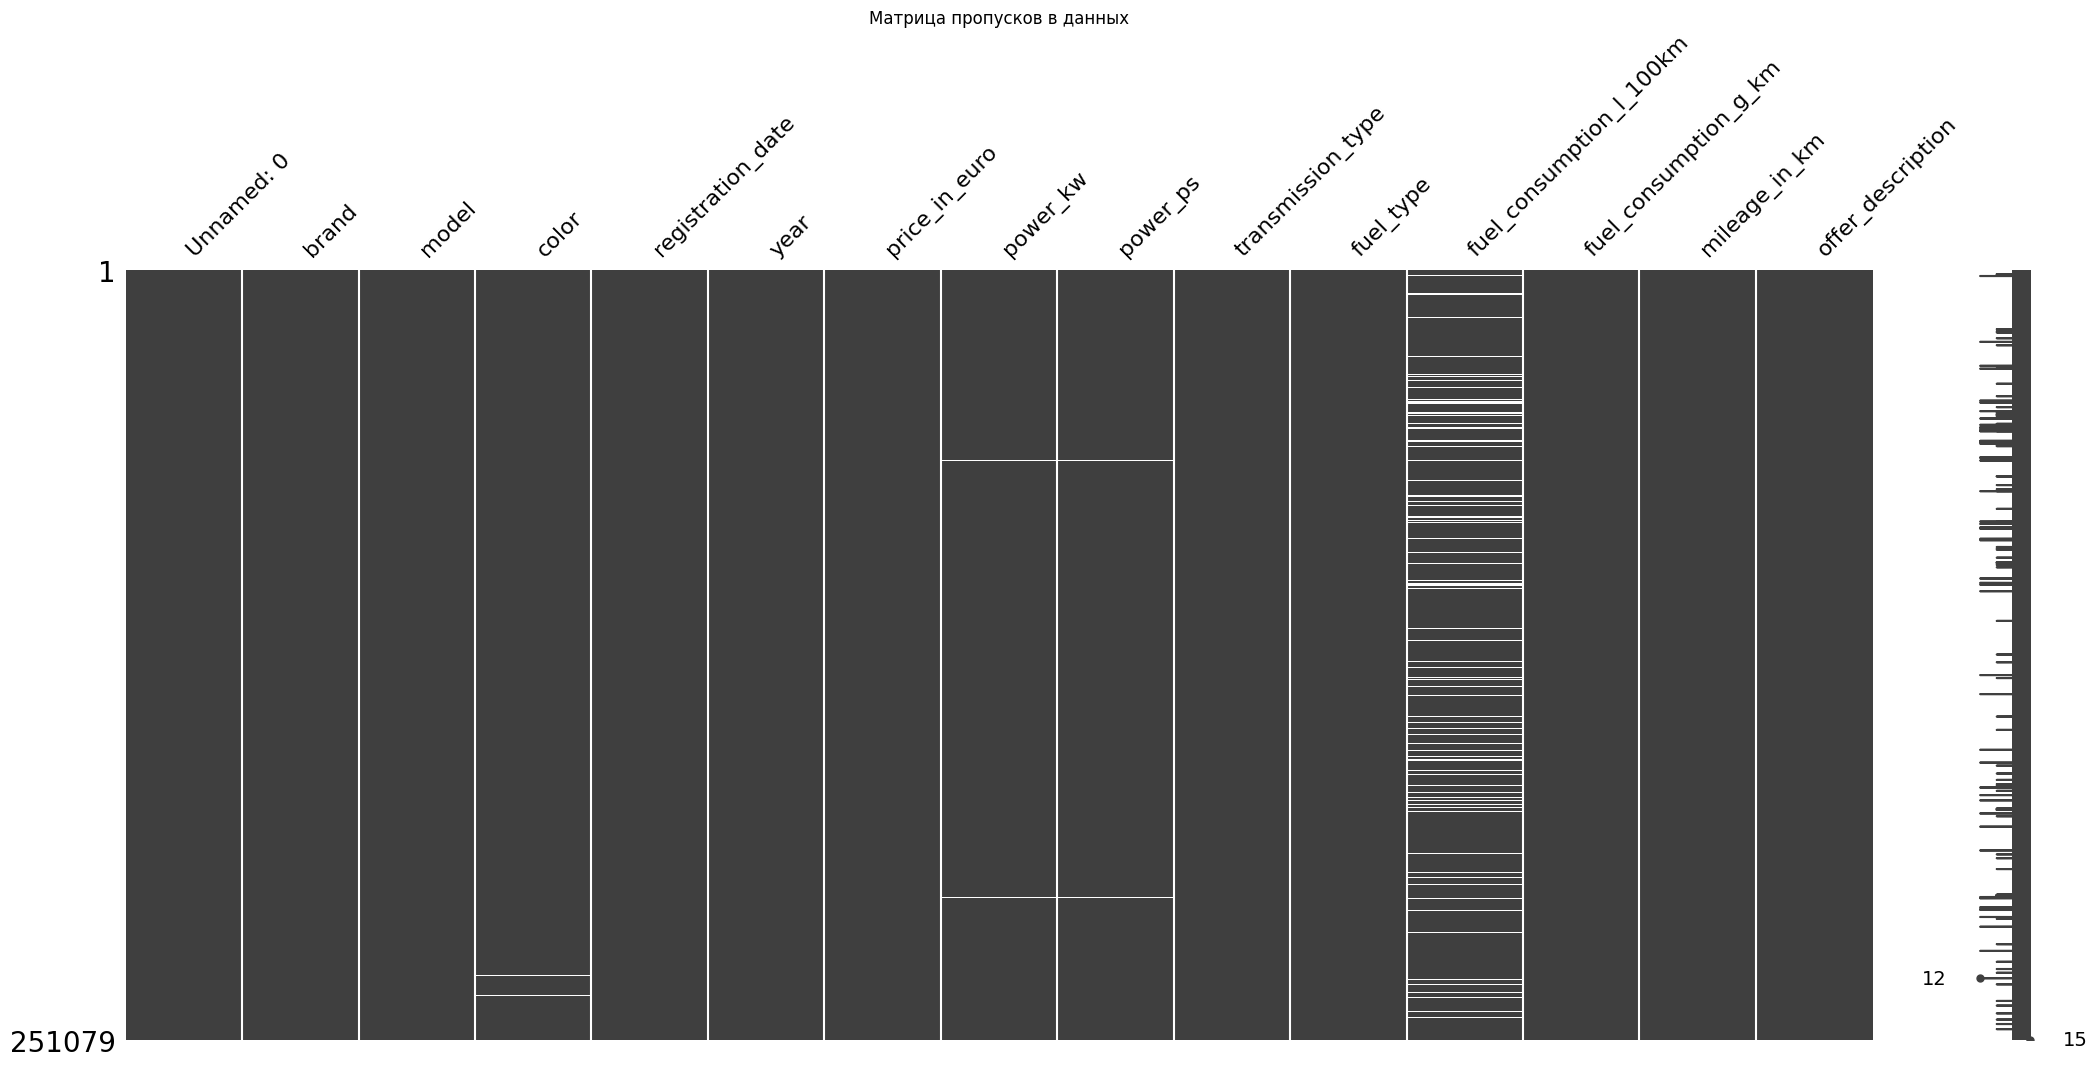

In [225]:
import missingno as msno

msno.matrix(df)
plt.title('Матрица пропусков в данных')
plt.show

Заполнение пропупсков по столбцам.
offer_description - имеет всего 1 пропуск, т.к. это описание машины и оно может быть для каждой машины разное, то просто заменим пропуск на 'Uknown'

color - т.к. это категориальное значение, пропусков достаточно много, то мы заменим пропуски на моду

registration_date - значение даты в типе object, стоит заменить на дату и заполнить даты предыдещей датой

power_kw и power_ps - в этих двух столбцах примерно одинаковое количество пропусков, скорее всего они случайны судя по матрице они находятся в одинаковых местах, поэтому мы можем заменить эти данные на медиану, предварительно изменив тип данных на количественный.

mileage_in_km - количественный признак, пропуски также, скорее всего, случайны, мы можем заменить пропуски на медиану

fuel_consumption_l_100km - имеет достаточно много пропусков. Логически это случайные пропуски, которые зарактеризую количественный тип данных. Так как у нас нет объема бензина, мы не можем выполнить более точный расчет для данного столбца, поэтому заполним пропуски медианой

fuel_consumption_g_km - несмотря на то, что у нас якобы по графику и таблице нет пропусков, на самом деле в датафрейме есть пропуски, но они обозначаются как "- (g/km)". Так как у нас не хватает данных для вычисления данного столбца (тип бензина - много измененных данных - для рассчета по формуле), то заменим каждый пропуск на медиану.


In [226]:
# Замена offer_description
df['offer_description'] = df['offer_description'].fillna('Unknown')

# Замена color 
color_mode = df['color'].mode()[0]
df['color'] = df['color'].fillna(color_mode)

# Преобразование registration_date в дату, а потом замена предыдущей датой
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')
df['registration_date'] = df['registration_date'].ffill()

# Изменение типа данных power_kw и замена пропусков на медиану 
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')
power_kw_median = df['power_kw'].median()
df['power_kw'] = df['power_kw'].fillna(power_kw_median)

# Изменение типа данных power_ps и замена пропусков на медиану 
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')
power_kw_median = df['power_ps'].median()
df['power_ps'] = df['power_ps'].fillna(power_kw_median)

# Замена пропусков в mileage_in_km на медиану 
mileage_in_km_median = df['mileage_in_km'].median()
df['mileage_in_km'] = df['mileage_in_km'].fillna(mileage_in_km_median)

# Изменение типа данных в fuel_consumption_l_100km, выброс лишних символов из данных, замена пропусков медианой
df['fuel_consumption_l_100km'] = (
    df['fuel_consumption_l_100km'].astype(str).str.extract(r'(\d+,\d+|\d+)')[0].str.replace(',', '.', regex=False).astype('float')
)
fuel_consumption_l_100km_median = df['fuel_consumption_l_100km'].median()
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].fillna(fuel_consumption_l_100km_median)

# Изменение типа данных в fuel_consumption_g_km, замена символов "- (g/km)" медианой
df['fuel_consumption_g_km'] = (
    df['fuel_consumption_l_100km'].astype(str).str.extract(r'(\d+\.?\d*)')[0].str.replace(',', '.', regex=False).astype('float')
)
fuel_consumption_g_km_median = df['fuel_consumption_g_km'].median()
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace('- (g/km)', fuel_consumption_g_km_median, regex=False)

df.info()

/var/folders/dn/zwr5h4y129gdz0vh13yd5vgr0000gp/T/ipykernel_81032/1598414489.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                251079 non-null  int64         
 1   brand                     251079 non-null  object        
 2   model                     251079 non-null  object        
 3   color                     251079 non-null  object        
 4   registration_date         251079 non-null  datetime64[ns]
 5   year                      251079 non-null  object        
 6   price_in_euro             251079 non-null  object        
 7   power_kw                  251079 non-null  float64       
 8   power_ps                  251079 non-null  float64       
 9   transmission_type         251079 non-null  object        
 10  fuel_type                 251079 non-null  object        
 11  fuel_consumption_l_100km  251079 non-null  float64       
 12  fu

Произведем преобразование типов данных, где это необходимо - price_in_euro - переведем в количественный тип данных. Оказалось, что в данных есть строковые значения, которые представлены не цифрами, их нужно почистить и заменить такие данные на медиану.

In [227]:
df['price_in_euro'] = (
    df['price_in_euro'].astype(str).str.replace('[^\d,.]', '', regex=True).str.replace(',', '.', n=1, regex=False).str.extract(r'(\d+\.?\d*)')[0].astype('float')
)

price_median = df['price_in_euro'].median()
df['price_in_euro'] = df['price_in_euro'].fillna(price_median)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dn/zwr5h4y129gdz0vh13yd5vgr0000gp/T/ipykernel_81032/1473316998.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['price_in_euro'].astype(str).str.replace('[^\d,.]', '', regex=True).str.replace(',', '.', n=1, regex=False).str.extract(r'(\d+\.?\d*)')[0].astype('float')


In [143]:
df.isna().sum()

Unnamed: 0                  0
brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
offer_description           0
dtype: int64

In [ ]:
Убираем те столбцы, которые нам не нужны для подсчета статистики 

In [228]:
df = df.drop(columns=['Unnamed: 0'])

Снова проверка базовых статистик, уже ожидаем значимые изменения, так как провели большую работу по изменениям типов количественных данных, при этом статистика по категориальным данным не должна поменяться совсем.

In [229]:
df.describe().round(2)

,registration_date,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,251079,251079.00,251079.00,251079.00,251079.00,251079.00,251079.00
mean,2016-09-13 12:29:20.663376640,26140.54,126.46,171.79,7.45,7.45,85329.22
min,1900-01-01 00:00:00,1.20,1.00,1.00,0.00,0.00,0.00
25%,2013-11-01 00:00:00,11990.00,82.00,111.00,5.00,5.00,24941.50
50%,2018-03-01 00:00:00,19890.00,110.00,150.00,5.70,5.70,67500.00
75%,2020-09-01 00:00:00,29950.00,140.00,190.00,6.60,6.60,126452.50
max,2023-11-01 00:00:00,5890500.00,2023.00,2022.00,2023.00,2023.00,3800000.00
std,NaN,37324.83,75.26,99.15,31.99,31.99,78694.45


In [230]:
df.describe(include = 'object')

,brand,model,color,year,transmission_type,fuel_type,offer_description
count,251079,251079,251079,251079,251079,251079,251079
unique,47,1312,14,91,4,136,200946
top,volkswagen,Volkswagen Golf,black,2019,Automatic,Petrol,Titanium
freq,33281,7588,58886,29225,131749,143280,174


Найдем выбросы в данных и подкрепим визуализацией. 

In [231]:
def outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers_mask = (df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)
    df_outliers = df[outliers_mask]

    return df_outliers

In [232]:
outliers_df_price = outliers('price_in_euro')
outliers_df_power_kw = outliers('power_kw')
outliers_df_power_ps = outliers('power_ps')
outliers_df_l_100km = outliers('fuel_consumption_l_100km')
outliers_df_g_km = outliers('fuel_consumption_g_km')
outliers_df_mileage_in_km = outliers('mileage_in_km')
print(f'Выбросы в price_in_euro:\n {outliers_df_price['price_in_euro'].sort_values()}')
# print(f'Выбросы в power_kw:\n {outliers_df_price['power_kw'].sort_values()}')
# print(f'Выбросы в power_kw:\n {outliers_df_price['power_ps'].sort_values()}')
# print(f'Выбросы в fuel_consumption_l_100km:\n {outliers_df_price['fuel_consumption_l_100km'].sort_values()}')
#print(f'Выбросы в fuel_consumption_g_km:\n {outliers_df_price['fuel_consumption_g_km'].sort_values()}')
# print(f'Выбросы в mileage_in_km:\n {outliers_df_price['mileage_in_km'].sort_values()}')

Выбросы в price_in_euro:
 212099      56895.0
121156      56899.0
43071       56899.0
43220       56899.0
121353      56899.0
            ...    
1509      2289000.0
106583    2490000.0
31381     2580724.0
93840     3250000.0
93699     5890500.0
Name: price_in_euro, Length: 15598, dtype: float64


/var/folders/dn/zwr5h4y129gdz0vh13yd5vgr0000gp/T/ipykernel_81032/882754764.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, labels=cols, patch_artist=True, showmeans=True)


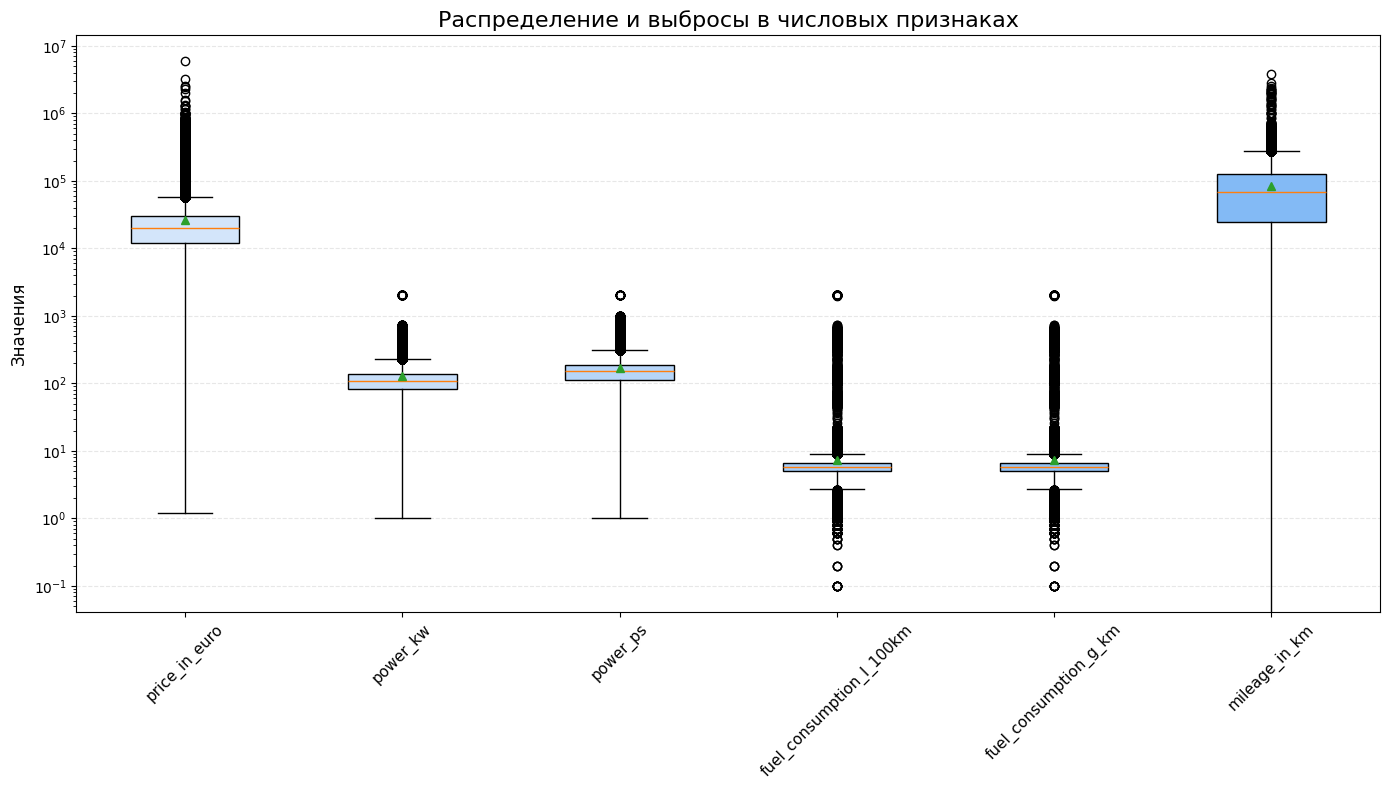

In [233]:
import seaborn as sns

cols = ['price_in_euro', 'power_kw', 'power_ps', 
        'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km']

data_to_plot = [df[col] for col in cols] 

plt.figure(figsize=(14, 8))
bp = plt.boxplot(data_to_plot, labels=cols, patch_artist=True, showmeans=True)


colors = ['#D3E5FA', '#C7DEF9', '#B6D5F8', '#A5CCF7', '#94C3F6', '#83BAF5']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Распределение и выбросы в числовых признаках', fontsize=16)
plt.ylabel('Значения', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yscale('log') 
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()


plt.show()

Выводы по выбросам:
1) price_in_euro - может иметь выбросы в виде высоких стоимостей автомобилей, потому что это редкие, возможно, коллекционные модели или спортивные машины.
2) power_kw и power_ps - могут иметь выбросы очень больших величин, возможно, это связано с тем, что машины спортивные или гоночные.
3) fuel_consumption_l_100km и fuel_consumption_g_km - аномально малый расход топливо может быть связан с тем, что автомобиль гибрид или электрокар, а аномально большой расход топлива может быть связан с опечатками/неправильными единицами ввода или автомобиль находится в плохом состоянии.
4) mileage_in_km - выбросы с аномально большими расстояниями может быть связано с тем, что автомобиль используется для службы такси или для деловых поездок.

Гипотезы к данному датафрейму:
1) Чем старше по возрасту машина, тем она дешевле стоит
2) Чем старше машина, тем больше расход топлива на 100 км
3) Цветные машины стоят дороже, чем за нейтрального цвета машины (белые/черные/серые и т.д.)
4) Чем больше километраж машины, тем меньше ее стоимость

Для рассчета некоторых гипотез будем брать графу registration_date, чтобы опираться на реальный износ машины, а не на год выпуска.

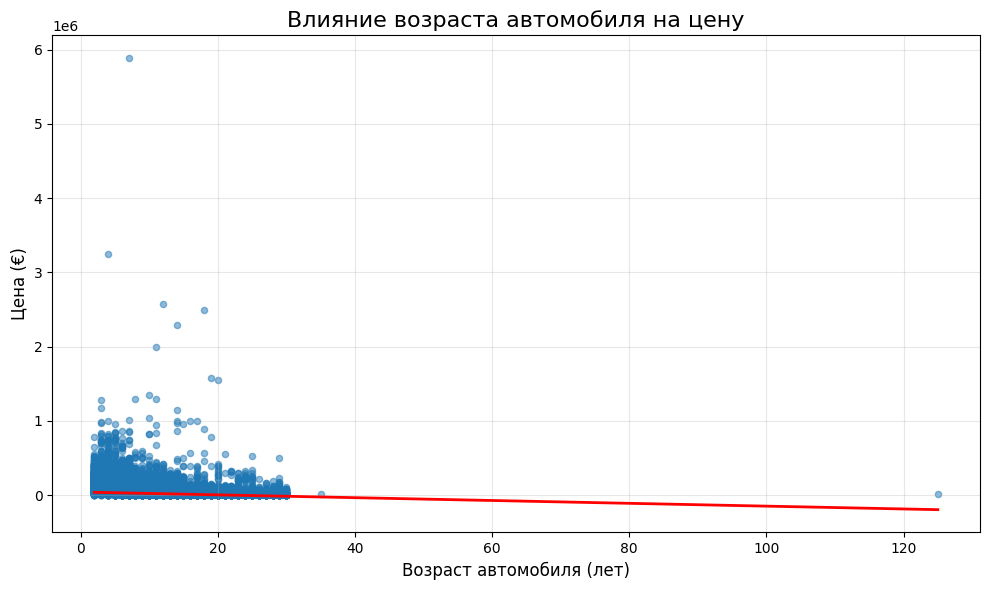

In [237]:
# Чем старше по возрасту машина, тем она дешевле стоит

# Считаем возраст автомобиля в годах
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')

from datetime import datetime
current_year = datetime.now().year

df['car_age'] = current_year - df['registration_date'].dt.year

# Создаем график
plt.figure(figsize = (10,6))
sns.regplot(data = df, x = 'car_age', y = 'price_in_euro', scatter_kws={'alpha': 0.5, 's': 20},
    line_kws={'color': 'red', 'linewidth': 2})

plt.title('Влияние возраста автомобиля на цену', fontsize=16)
plt.xlabel('Возраст автомобиля (лет)', fontsize=12)
plt.ylabel('Цена (€)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

Вывод: на графике представлена линейная связь возраста автомобиля с его ценой, связь, по всей видимости, слабовыраженная и отрицательная, есть тенденция к тому, что чем старше автомобиль, тем ниже будет на него цена, но, в основном, возраст не сильно влияет на стоимость. Гипотеза принимается

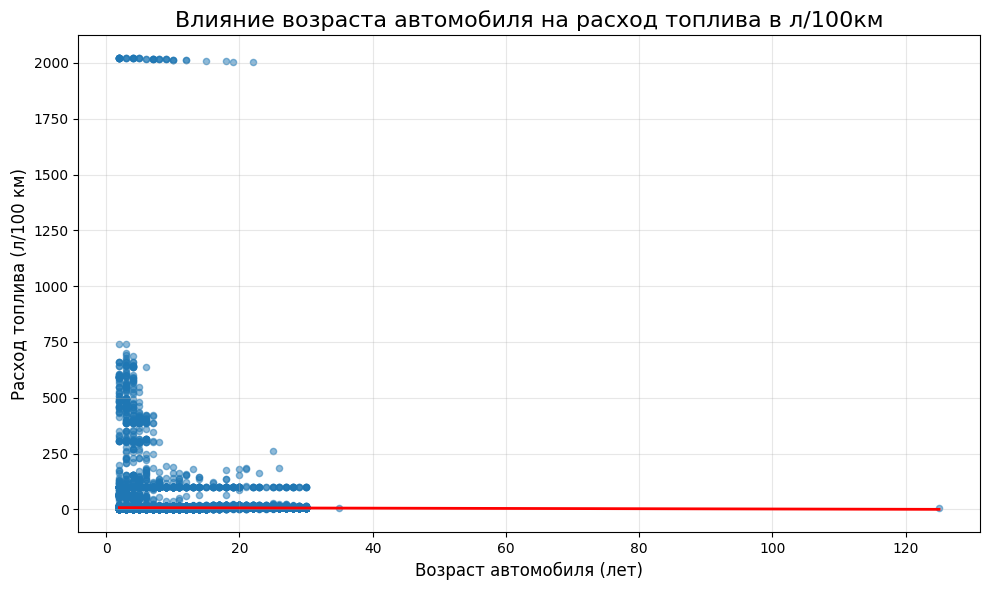

In [238]:
# Чем старше машина, тем больше расход топлива на 100 км
plt.figure(figsize = (10,6))
sns.regplot(data = df, x = 'car_age', y = 'fuel_consumption_l_100km', scatter_kws={'alpha': 0.5, 's': 20},
    line_kws={'color': 'red', 'linewidth': 2})

plt.title('Влияние возраста автомобиля на расход топлива в л/100км', fontsize=16)
plt.xlabel('Возраст автомобиля (лет)', fontsize=12)
plt.ylabel('Расход топлива (л/100 км)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

Вывод: опираясь на линейный график, нельзя найти четкую зависимость, что говорит о том, что нет зависимости между возрастом автомобиля и расходом топлива. Гипотеза не принимается

/var/folders/dn/zwr5h4y129gdz0vh13yd5vgr0000gp/T/ipykernel_81032/3901134363.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='Set2')


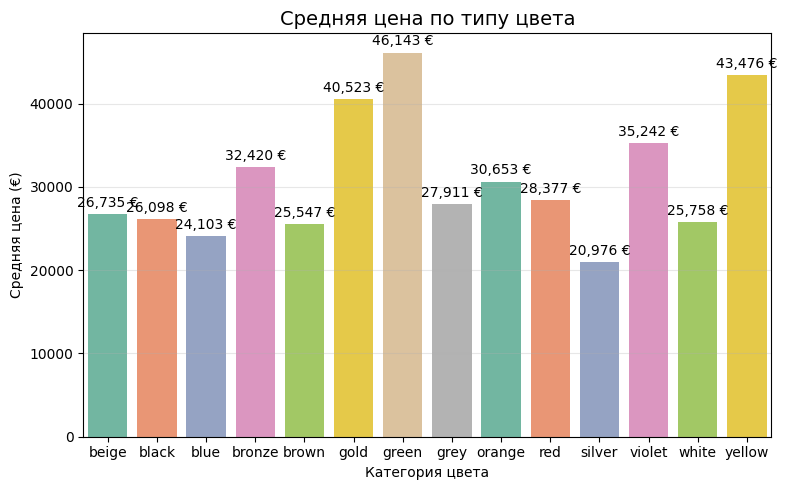

In [241]:
# Цветные машины стоят дороже, чем белые/серые/черные машины

# Рассчитываем среднюю цену по категориям
avg_price = df.groupby('color')['price_in_euro'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='Set2')

# Добавим числа над столбцами
for i, v in enumerate(avg_price):
    plt.text(i, v + 500, f'{v:,.0f} €', ha='center', va='bottom', fontsize=10)

plt.title('Средняя цена по типу цвета', fontsize=14)
plt.xlabel('Категория цвета')
plt.ylabel('Средняя цена (€)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Вывод: на данном графике можно увидеть, что средняя цена цветных машин - бронзовых, золотых, зеденых, оранжевых, красных, фиолетовых и желтых - в действительности более высокая, чем у машин с более нейтральным цветом. Гипотеза принимается.

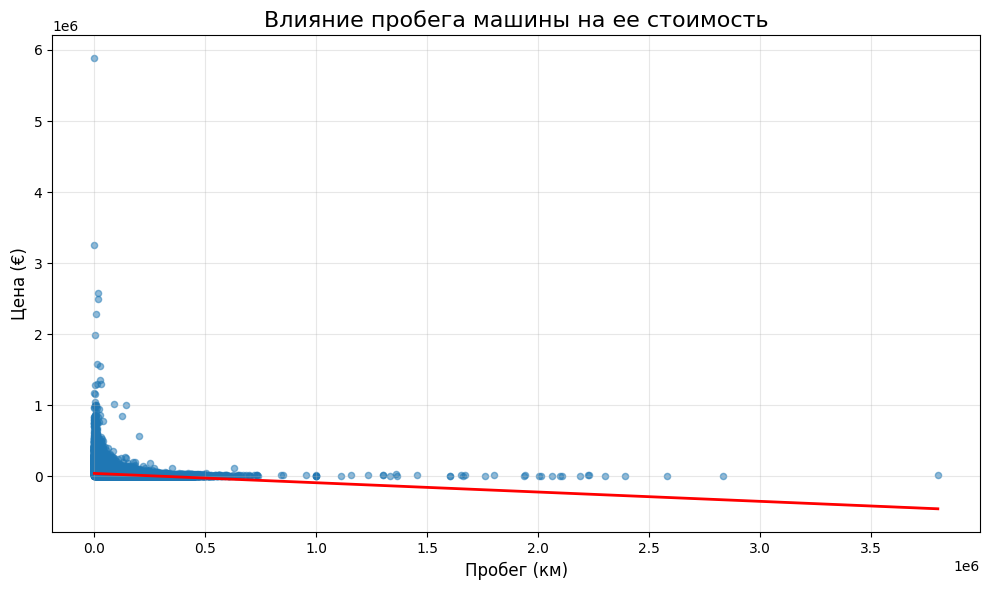

In [242]:
# Чем больше километраж машины, тем меньше ее стоимость
plt.figure(figsize = (10,6))
sns.regplot(data = df, x = 'mileage_in_km', y = 'price_in_euro', scatter_kws={'alpha': 0.5, 's': 20},
    line_kws={'color': 'red', 'linewidth': 2})

plt.title('Влияние пробега машины на ее стоимость', fontsize=16)
plt.xlabel('Пробег (км)', fontsize=12)
plt.ylabel('Цена (€)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

Вывод: на представленном линейном графике есть обратная отрицательная связь - с увеличением пробега машины ее стоимость уменьшается. Гипотеза принимается.